<a href="https://colab.research.google.com/github/arifshekhk8/Daily-Minimum-Temperature-Forecasting/blob/main/notebook/Daily_Minimum_Temperature_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Acquisition & Initial Review**

In [1]:
import pandas as pd

df = pd.read_csv(
    "daily-minimum-temperatures-in-me.csv",
    on_bad_lines='skip'   # skips broken rows
)

df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [2]:
df.isnull().sum()

,0
Date,0
"Daily minimum temperatures in Melbourne, Australia, 1981-1990",0


In [3]:
df.describe()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
count,3650,3650
unique,3650,230
top,1990-12-31,10.0
freq,1,51


In [4]:
df.columns

Index(['Date', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990'], dtype='object')

In [5]:
df.rename(
    columns={"Daily minimum temperatures in Melbourne, Australia, 1981-1990": "Temp"},
    inplace=True
)

In [6]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [7]:
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')

In [8]:
df.dtypes

,0
Date,object
Temp,float64


In [9]:
df['Temp'].describe()

,Temp
count,3647.000000
mean,11.186647
std,4.061671
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


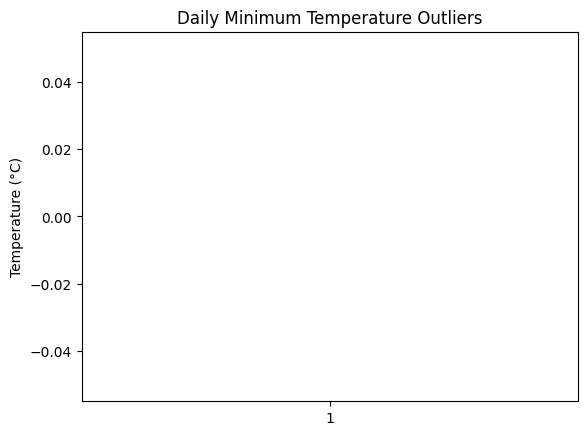

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df['Temp'])
plt.title("Daily Minimum Temperature Outliers")
plt.ylabel("Temperature (°C)")
plt.show()

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

,0
Date,datetime64[ns]
Temp,float64


In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

In [14]:
df.head()

,Date,Temp,Year,Month,Week
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,1
2,1981-01-03,18.8,1981,1,1
3,1981-01-04,14.6,1981,1,1
4,1981-01-05,15.8,1981,1,2


In [15]:
df.isnull().sum()

,0
Date,0
Temp,3
Year,0
Month,0
Week,0


In [16]:
df['Temp'] = df['Temp'].fillna(df['Temp'].mean())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
 2   Year    3650 non-null   int32         
 3   Month   3650 non-null   int32         
 4   Week    3650 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2)
memory usage: 103.5 KB


# **2. Exploratory Data Analysis (EDA),**

**2.1 Overall Temperature Trend (Time Series Plot)**

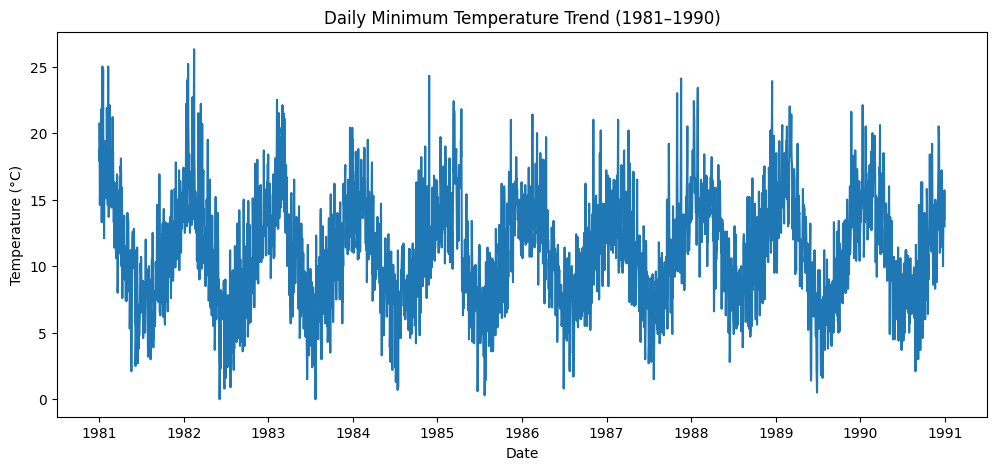

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Temp'])
plt.title("Daily Minimum Temperature Trend (1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

**2.2 Monthly Average Temperature Across Years**

In [19]:
monthly_avg = df.groupby(['Year', 'Month'])['Temp'].mean().reset_index()
monthly_avg.head()

,Year,Month,Temp
0,1981,1,17.712903
1,1981,2,17.678571
2,1981,3,13.500000
3,1981,4,12.356667
4,1981,5,9.490323


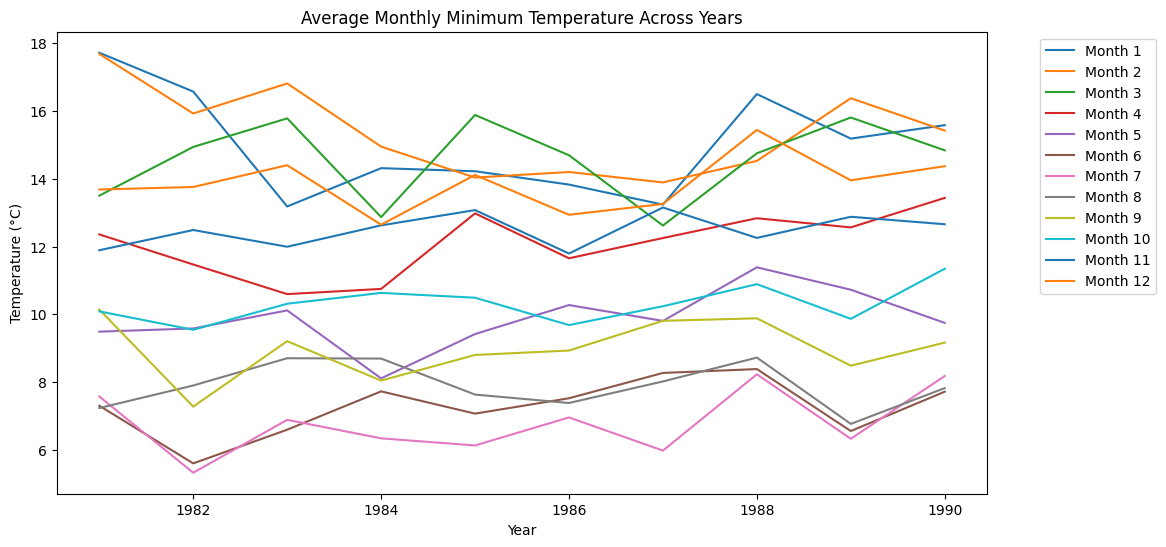

In [20]:
plt.figure(figsize=(12,6))

for month in range(1, 13):
    data = monthly_avg[monthly_avg['Month'] == month]
    plt.plot(data['Year'], data['Temp'], label=f'Month {month}')

plt.title("Average Monthly Minimum Temperature Across Years")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**2.3 Weekly Temperature Trend**

In [21]:
weekly_avg = df.groupby(['Year', 'Week'])['Temp'].mean().reset_index()
weekly_avg.head()

,Year,Week,Temp
0,1981,1,18.000000
1,1981,2,17.542857
2,1981,3,20.371429
3,1981,4,15.771429
4,1981,5,16.657143


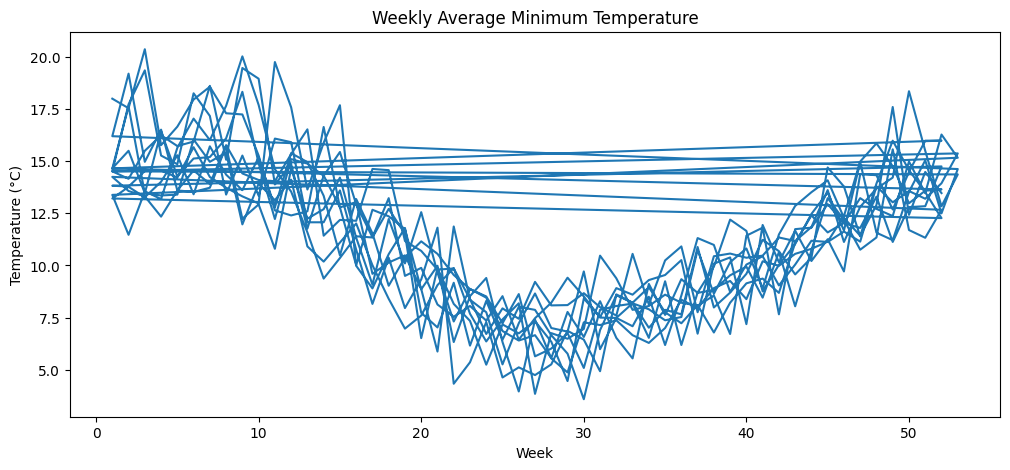

In [22]:
plt.figure(figsize=(12,5))
plt.plot(weekly_avg['Week'], weekly_avg['Temp'])
plt.title("Weekly Average Minimum Temperature")
plt.xlabel("Week")
plt.ylabel("Temperature (°C)")
plt.show()

**Monthly Distribution using Boxplot**

<Figure size 1000x500 with 0 Axes>

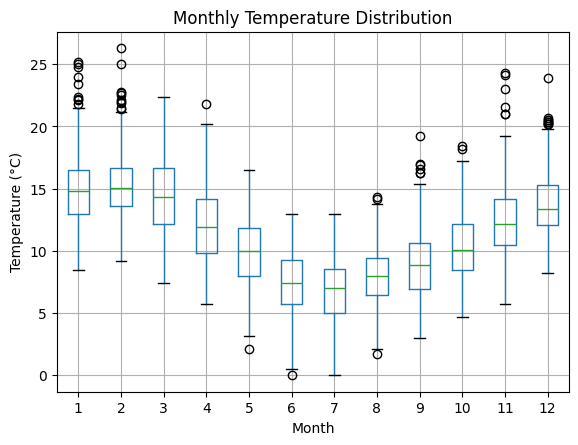

In [23]:
plt.figure(figsize=(10,5))
df.boxplot(column='Temp', by='Month')
plt.title("Monthly Temperature Distribution")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

# **Step 3: Feature Engineering**

**3.1 Rolling Mean & Rolling Standard Deviation (Weekly)**

In [24]:
df = df.sort_values('Date')

In [25]:
df['Temp_Rolling_Mean_7'] = df['Temp'].rolling(window=7).mean()
df['Temp_Rolling_Std_7'] = df['Temp'].rolling(window=7).std()

In [26]:
df[['Date', 'Temp', 'Temp_Rolling_Mean_7', 'Temp_Rolling_Std_7']].head(10)

,Date,Temp,Temp_Rolling_Mean_7,Temp_Rolling_Std_7
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,NaN,NaN
2,1981-01-03,18.8,NaN,NaN
3,1981-01-04,14.6,NaN,NaN
4,1981-01-05,15.8,NaN,NaN
5,1981-01-06,15.8,NaN,NaN
6,1981-01-07,15.8,17.057143,2.152407
7,1981-01-08,17.4,16.585714,1.476966
8,1981-01-09,21.8,17.142857,2.462287
9,1981-01-10,20.0,17.314286,2.632761


**Step 3.2: Handle NaN Values**

In [27]:
df = df.dropna()

Verify:

In [28]:
df.isnull().sum()

,0
Date,0
Temp,0
Year,0
Month,0
Week,0
Temp_Rolling_Mean_7,0
Temp_Rolling_Std_7,0


**Step 3.3: Categorical Temperature Feature**

In [29]:
def temp_category(temp):
    if temp <= 8:
        return 'Cold'
    elif temp <= 15:
        return 'Moderate'
    else:
        return 'Hot'

df['Temp_Category'] = df['Temp'].apply(temp_category)

In [30]:
df[['Temp', 'Temp_Category']].head(10)

,Temp,Temp_Category
6,15.8,Hot
7,17.4,Hot
8,21.8,Hot
9,20.0,Hot
10,16.2,Hot
11,13.3,Moderate
12,16.7,Hot
13,21.5,Hot
14,25.0,Hot
15,20.7,Hot


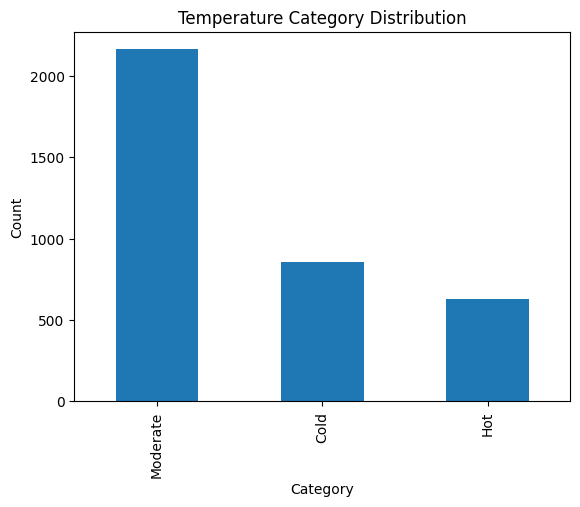

In [31]:
import matplotlib.pyplot as plt

df['Temp_Category'].value_counts().plot(kind='bar')
plt.title("Temperature Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**3.4 Verify Feature Engineering**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3644 entries, 6 to 3649
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3644 non-null   datetime64[ns]
 1   Temp                 3644 non-null   float64       
 2   Year                 3644 non-null   int32         
 3   Month                3644 non-null   int32         
 4   Week                 3644 non-null   UInt32        
 5   Temp_Rolling_Mean_7  3644 non-null   float64       
 6   Temp_Rolling_Std_7   3644 non-null   float64       
 7   Temp_Category        3644 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 217.1+ KB


# **Step 4: Forecasting Models**

**4.1 Prepare Features & Target**

In [34]:
feature_cols = [
    'Temp_Rolling_Mean_7',
    'Temp_Rolling_Std_7',
    'Year',
    'Month'
]

X = df[feature_cols]
y = df['Temp']

**4.2 Time-Based Train–Test Split**

In [35]:
split_date = '1989-01-01'

X_train = X[df['Date'] < split_date]
X_test  = X[df['Date'] >= split_date]

y_train = y[df['Date'] < split_date]
y_test  = y[df['Date'] >= split_date]

print(len(X_train), len(X_test))

2914 730


**4.3 Import Models & Metrics**

In [36]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

**4.4 Train & Evaluate Models**

In [37]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return rmse, r2

**1️⃣ Linear Regression**

In [38]:
lr = LinearRegression()
lr_rmse, lr_r2 = evaluate_model(lr, X_train, y_train, X_test, y_test)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R²:", lr_r2)

Linear Regression RMSE: 2.2306504225026655
Linear Regression R²: 0.704545143731535


**2️⃣ Ridge Regression**

In [39]:
ridge = Ridge(alpha=1.0)
ridge_rmse, ridge_r2 = evaluate_model(ridge, X_train, y_train, X_test, y_test)

print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R²:", ridge_r2)

Ridge Regression RMSE: 2.2306526554611636
Ridge Regression R²: 0.7045445522101064


**3️⃣ Decision Tree Regressor**

In [40]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_rmse, dt_r2 = evaluate_model(dt, X_train, y_train, X_test, y_test)

print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R²:", dt_r2)

Decision Tree RMSE: 2.346467760101287
Decision Tree R²: 0.6730681095126717


**4️⃣ Random Forest Regressor**

In [41]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf_rmse, rf_r2 = evaluate_model(rf, X_train, y_train, X_test, y_test)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)

Random Forest RMSE: 2.2470688855164793
Random Forest R²: 0.7001798098369756


**4.5 Compare Model Performance (Table)**

In [42]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lr_rmse, ridge_rmse, dt_rmse, rf_rmse],
    'R2': [lr_r2, ridge_r2, dt_r2, rf_r2]
})

results

,Model,RMSE,R2
0,Linear Regression,2.230650,0.704545
1,Ridge Regression,2.230653,0.704545
2,Decision Tree,2.346468,0.673068
3,Random Forest,2.247069,0.700180


Visual Comparison

<Axes: title={'center': 'Model RMSE Comparison'}, xlabel='Model'>

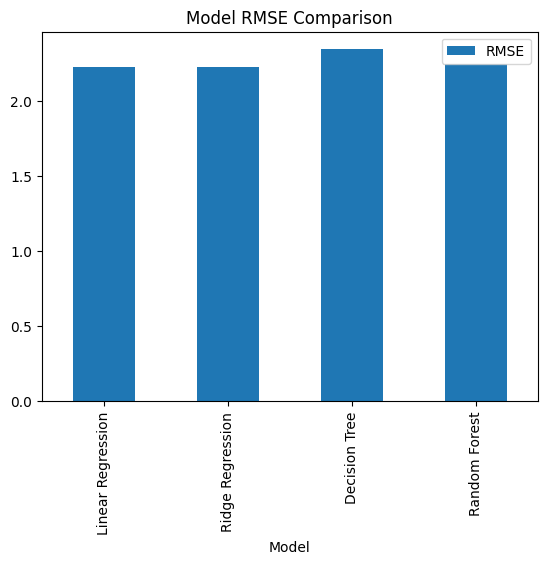

In [43]:
results.plot(x='Model', y='RMSE', kind='bar', title='Model RMSE Comparison')

<Axes: title={'center': 'Model R2 Comparison'}, xlabel='Model'>

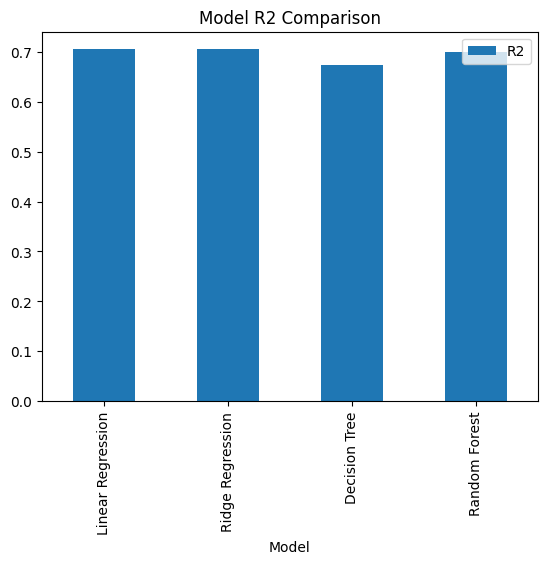

In [44]:
results.plot(x='Model', y='R2', kind='bar', title='Model R2 Comparison')

# **Step 5: Business Insights & Visualization**

Feature Importance

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

importance = rf.feature_importances_
features = X.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

fi

,Feature,Importance
0,Temp_Rolling_Mean_7,0.952837
1,Temp_Rolling_Std_7,0.040982
3,Month,0.003602
2,Year,0.002579


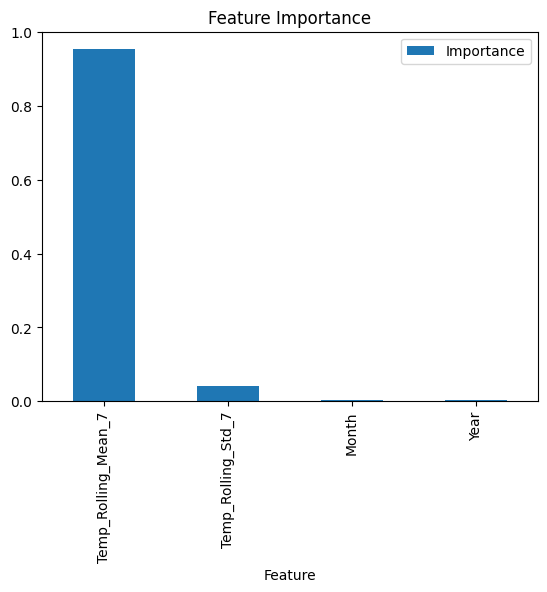

In [46]:
fi.plot(x='Feature', y='Importance', kind='bar', title='Feature Importance')
plt.show()

**5.2 Seasonal Risk Analysis (High / Low Temperature Periods)**

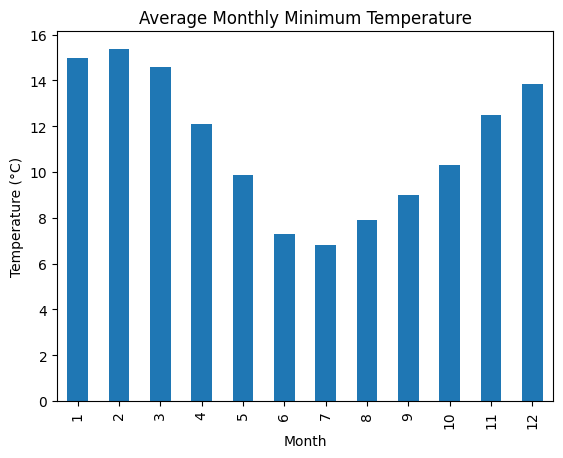

In [47]:
monthly_avg = df.groupby('Month')['Temp'].mean()

monthly_avg.plot(kind='bar', title='Average Monthly Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

# Interpretation:
	•	Coldest months → June–August
	•	Warmest months → December–February



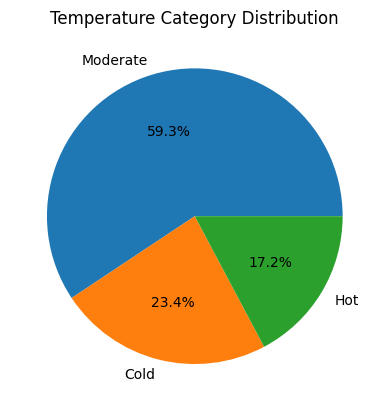

In [48]:
df['Temp_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Temperature Category Distribution')
plt.ylabel('')
plt.show()

**Forecast Visualization**

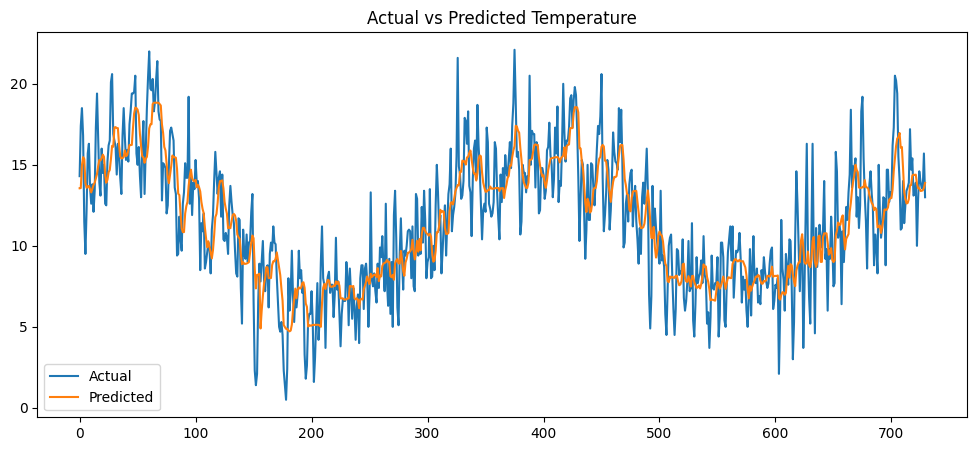

In [49]:
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(preds, label='Predicted')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()